### Trend Following | Cruzamento de Médias Móveis
#### Período de análise: Janeiro de 2015 até Março de 2021.
##### Autor: Saulo Brendo Alves de Jesus 
##### LinkedIn: linkedin.com/in/saulo-brendo/

### Importar bibliotecas

In [1]:
# Importar bibliotecas necessárias
%matplotlib inline
import quantstats as qs
import pandas as pd
import numpy as np
import matplotlib as plt
from pandas_datareader import data
import warnings
warnings.simplefilter("ignore")

### Obter dados via API do Yahoo Finance

In [2]:
# Definir ativo
ticker = "BTC-USD"

# Definindo período
init_data = '1/1/2020'
end_data = "31/03/2021"

# Solicitação de dados através da API
dados_ativo = data.DataReader(ticker,'yahoo',init_data,end_data)
dados_ativo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,1.856566e+10,7200.174316
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,2.080208e+10,6985.470215
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,2.811148e+10,7344.884277
2020-01-04,7427.385742,7309.514160,7345.375488,7410.656738,1.844427e+10,7410.656738
2020-01-05,7544.497070,7400.535645,7410.451660,7411.317383,1.972507e+10,7411.317383


In [3]:
# Estatística Descritiva dos Retornos
dados_ativo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 453 entries, 2020-01-01 to 2021-03-31
Data columns (total 6 columns):
High         453 non-null float64
Low          453 non-null float64
Open         453 non-null float64
Close        453 non-null float64
Volume       453 non-null float64
Adj Close    453 non-null float64
dtypes: float64(6)
memory usage: 24.8 KB


### Adicionar valores de Médias Móveis 

In [4]:
# Definir valor das Médias Móveis rápida e lenta
FastMA = 9
SlowMA = 28

# Criar coluna com os valores das Médias Móveis
dados_ativo['Fast MA'] = np.round(dados_ativo['Adj Close'].rolling(window=FastMA).mean(),2)
dados_ativo['Slow MA'] = np.round(dados_ativo['Adj Close'].rolling(window=SlowMA).mean(),2)
dados_ativo.head()

,High,Low,Open,Close,Volume,Adj Close,Fast MA,Slow MA
Date,,,,,,,,
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,1.856566e+10,7200.174316,NaN,NaN
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,2.080208e+10,6985.470215,NaN,NaN
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,2.811148e+10,7344.884277,NaN,NaN
2020-01-04,7427.385742,7309.514160,7345.375488,7410.656738,1.844427e+10,7410.656738,NaN,NaN
2020-01-05,7544.497070,7400.535645,7410.451660,7411.317383,1.972507e+10,7411.317383,NaN,NaN


### Visualização

Text(0, 0.5, 'Preço da unidade em Dólar')

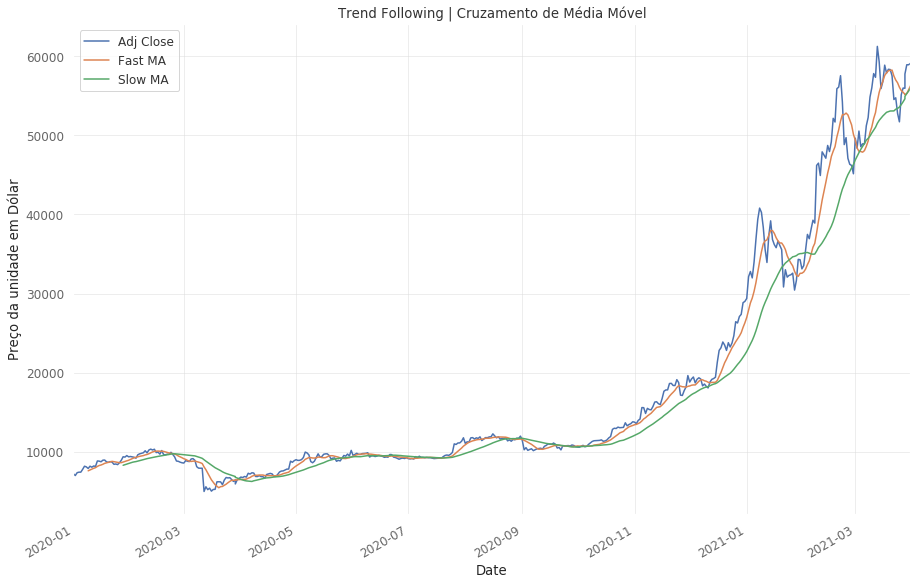

In [11]:
# Plotar gráfico contendo Preço Ajustado, Média Móvel Rápida e Média Móvel Lenta.
dados_ativo[['Adj Close', 'Fast MA', 'Slow MA']].plot(grid = True, figsize = (15,10))
plt.pyplot.title("Trend Following | Cruzamento de Média Móvel")
plt.pyplot.ylabel("Preço da unidade em Dólar")

### Regras de Trading

In [6]:
# Comprado
dados_ativo['Sinal'] = np.where(dados_ativo['Fast MA'] > dados_ativo['Slow MA'], 1, 0)

# Neutro
dados_ativo['Sinal'] = np.where(dados_ativo['Slow MA'] >= dados_ativo['Fast MA'], 0, dados_ativo['Sinal'])

# Calcular dias comprados e neutros
dados_ativo['Sinal'].value_counts()

1    302
0    151
Name: Sinal, dtype: int64

### Retornos

In [7]:
# Calcular retorno logarítmico do ativo
dados_ativo['Retornos'] = np.log(dados_ativo['Adj Close'] / dados_ativo['Adj Close'].shift(1))

# Calcular retorno de acordo com a posição
dados_ativo['CMA Strategy'] = dados_ativo['Retornos'] * dados_ativo['Sinal'].shift(1)
dados_ativo.head()

,High,Low,Open,Close,Volume,Adj Close,Fast MA,Slow MA,Sinal,Retornos,CMA Strategy
Date,,,,,,,,,,,
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,1.856566e+10,7200.174316,NaN,NaN,0,NaN,NaN
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,2.080208e+10,6985.470215,NaN,NaN,0,-0.030273,-0.0
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,2.811148e+10,7344.884277,NaN,NaN,0,0.050172,0.0
2020-01-04,7427.385742,7309.514160,7345.375488,7410.656738,1.844427e+10,7410.656738,NaN,NaN,0,0.008915,0.0
2020-01-05,7544.497070,7400.535645,7410.451660,7411.317383,1.972507e+10,7411.317383,NaN,NaN,0,0.000089,0.0


In [8]:
# Estatística Descritiva dos Retornos
dados_ativo['Retornos'].describe()

count    452.000000
mean       0.004657
std        0.041965
min       -0.464730
25%       -0.011091
50%        0.003275
75%        0.021464
max        0.171821
Name: Retornos, dtype: float64

### Backtest 

                    Strategy
------------------  ----------
Start Period        2020-01-01
End Period          2021-03-31
Risk-Free Rate      0.0%
Time in Market      67.0%

Cumulative Return   399.42%
CAGR%               263.33%
Sharpe              2.17
Sortino             3.66
Max Drawdown        -26.3%
Longest DD Days     80

Payoff Ratio        1.22
Profit Factor       1.62
Common Sense Ratio  2.29
CPC Index           1.13
Tail Ratio          1.41
Outlier Win Ratio   6.57
Outlier Loss Ratio  3.06

MTD                 13.93%
3M                  45.54%
6M                  236.46%
YTD                 36.11%
1Y                  404.33%
3Y (ann.)           263.33%
5Y (ann.)           263.33%
10Y (ann.)          263.33%
All-time (ann.)     263.33%

Avg. Drawdown       -5.61%
Avg. Drawdown Days  14
Recovery Factor     15.19
Ulcer Index         inf


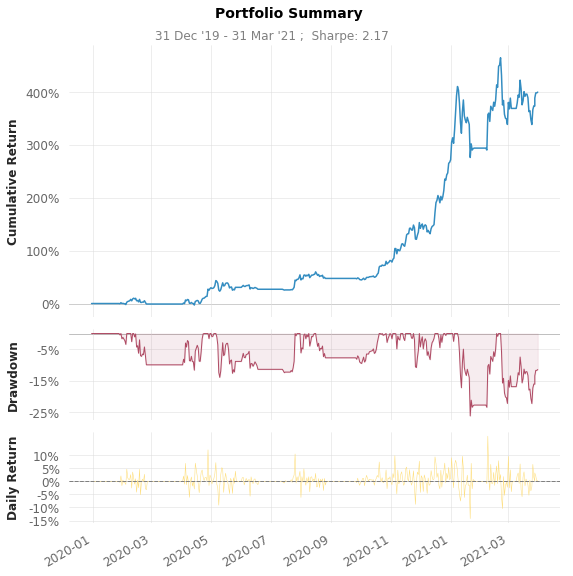

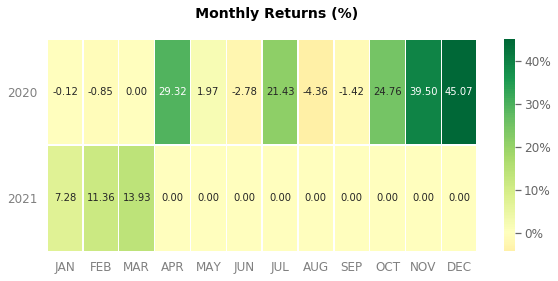

In [9]:
# Realizar Backtest da Estratégia Cruzamento de Médias Móveis 
qs.reports.basic(dados_ativo['CMA Strategy'])

                    Strategy
------------------  ----------
Start Period        2020-01-01
End Period          2021-03-31
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   423.47%
CAGR%               277.31%
Sharpe              1.76
Sortino             2.42
Max Drawdown        -59.66%
Longest DD Days     264

Payoff Ratio        1.13
Profit Factor       1.44
Common Sense Ratio  1.88
CPC Index           0.91
Tail Ratio          1.31
Outlier Win Ratio   3.68
Outlier Loss Ratio  3.82

MTD                 28.32%
3M                  96.7%
6M                  369.98%
YTD                 83.95%
1Y                  636.58%
3Y (ann.)           277.31%
5Y (ann.)           277.31%
10Y (ann.)          277.31%
All-time (ann.)     277.31%

Avg. Drawdown       -7.92%
Avg. Drawdown Days  16
Recovery Factor     7.1
Ulcer Index         inf


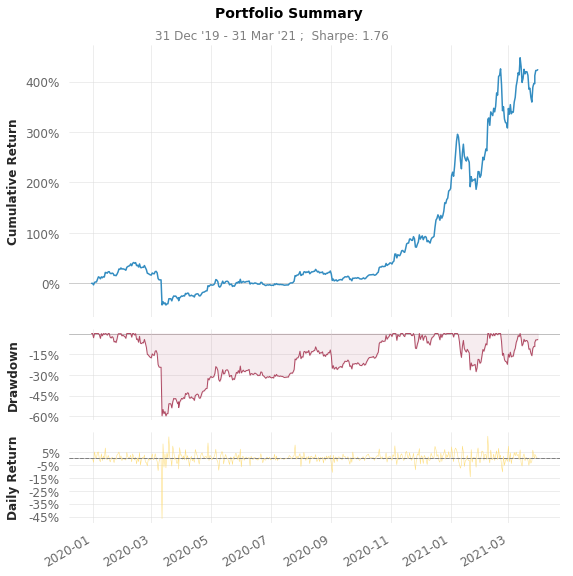

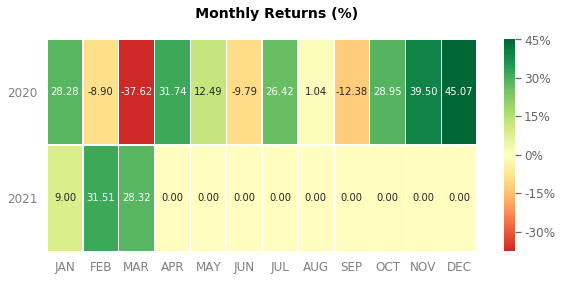

In [10]:
# Realizar Backtest do Buy n' Hold do Bitcoin x Dólar
qs.reports.basic(dados_ativo['Retornos'])